## 파일 경로

In [294]:
import os
import pandas as pd

# 폰트설정
import matplotlib.font_manager as fm
from matplotlib import rc

rc('font', family=fm.FontProperties(fname='C:/Users/HYUK/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Thin.ttf').get_name())


dir_path = "../csv_data/"

# 해당 위치에 존재하는 파일들을 리스트로 반환하는 함수
def get_file_list(directory):
    file_list = []

    # 디렉터리 내의 모든 항목에 대해 반복합니다.
    for item in os.listdir(directory):
        # 전체 경로를 생성합니다.
        item_path = os.path.join(directory, item)

        # 파일인 경우에만 리스트에 추가합니다.
        if os.path.isfile(item_path):
            file_list.append(item)

    return file_list

file_path = get_file_list(dir_path)
print(file_path)

def read_csv(file_path : str, do_print : bool = True ):
    df = pd.read_csv(dir_path+file_path)
    if do_print :
        print(file_path,"\n")
        print("데이터 프레임 구조:", df.shape,"\n")
        print(df.head())
        print("\n데이터 정보 :\n")
        print(df.info())
        print("\nNan 값 존재 데이터")
        print(df[df.isnull().any(axis=1)])
    return df

def save_csv(file_path : str, df : pd.DataFrame, ):
    new_data_path = "../new_csv/new_"+file_path
    
    data_path_os = os.path.dirname(new_data_path)
    if not os.path.exists(data_path_os):
        os.makedirs(data_path_os)

    
    # 데이터 저장
    df.to_csv("../new_csv/new_"+file_path, index=False)


['GDP.csv', '경제성장률.csv', '국제_에너지_원자제가격.csv', '미국_Fed_기준금리.csv', '생산자물가지수.csv', '소비자물가지수.csv', '실업률.csv', '원달러_환율.csv', '은행대출금_연체율.csv', '주택매매가격지수.csv', '통화량.csv', '한국은행_기준금리.csv']


In [295]:
for i in range(len(file_path)):
    df = pd.read_csv(dir_path+file_path[i])
    print(file_path[i],"\n")
    print("데이터 프레임 구조:", df.shape,"\n")
    print(df.head())
    print("\n데이터 정보 :\n")
    print(df.info())
    print("\nNan 값 존재 데이터")
    print(df[df.isnull().any(axis=1)])

GDP.csv 

데이터 프레임 구조: (100, 4) 

        변환        원자료   전기대비증감  전기대비증감률
0  2000/Q1  164,844.8      NaN      NaN
1  2000/Q2  166,144.7  1,299.9      0.8
2  2000/Q3  171,511.6  5,366.9      3.2
3  2000/Q4  173,231.4  1,719.8      1.0
4  2001/Q1  178,437.2  5,205.8      3.0

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       100 non-null    object 
 1   원자료      98 non-null     object 
 2   전기대비증감   97 non-null     object 
 3   전기대비증감률  97 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Nan 값 존재 데이터
         변환        원자료 전기대비증감  전기대비증감률
0   2000/Q1  164,844.8    NaN      NaN
98  2024/Q3        NaN    NaN      NaN
99  2024/Q4        NaN    NaN      NaN
경제성장률.csv 

데이터 프레임 구조: (312, 2) 

        변환  원자료
0  1947/Q1  NaN
1  1947/Q2  NaN
2  1947/Q3  NaN
3  1947/Q4  NaN
4  1948/Q1  NaN

데이터 정보 :

<class 'pandas.c

## 1.전처리

### 1-1)한국은행 기준금리
- **정의**: 특정 시점의 주택 매매 가격을 기준으로 하여 가격 변동을 나타내는 지표
- 특정값 추출: 해당 값도 지속적으로 증가하기에 증감률만 추출하겠습니다.

In [296]:
import pandas as pd

file_num = 11

df_11 = read_csv(file_path[file_num])

한국은행_기준금리.csv 

데이터 프레임 구조: (370, 4) 

        변환  원자료  전기대비증감  전기대비증감률
0  1994/01  NaN     NaN      NaN
1  1994/02  NaN     NaN      NaN
2  1994/03  NaN     NaN      NaN
3  1994/04  NaN     NaN      NaN
4  1994/05  NaN     NaN      NaN

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       370 non-null    object 
 1   원자료      306 non-null    float64
 2   전기대비증감   305 non-null    float64
 3   전기대비증감률  305 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.7+ KB
None

Nan 값 존재 데이터
         변환   원자료  전기대비증감  전기대비증감률
0   1994/01   NaN     NaN      NaN
1   1994/02   NaN     NaN      NaN
2   1994/03   NaN     NaN      NaN
3   1994/04   NaN     NaN      NaN
4   1994/05   NaN     NaN      NaN
..      ...   ...     ...      ...
60  1999/01   NaN     NaN      NaN
61  1999/02   NaN     NaN      NaN
62  1999/03   NaN     NaN      Na

In [297]:
import os
file_num = 11
df = df_11

columns = df.columns
df = df[[columns[0], columns[1]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'기준금리'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

df_itr = df

# 파일 저장
save_csv(file_path= file_path[file_num], df = df) 

          변환   원자료
0    1994/01   NaN
1    1994/02   NaN
2    1994/03   NaN
3    1994/04   NaN
4    1994/05   NaN
..       ...   ...
365  2024/06  3.50
366  2024/07  3.50
367  2024/08  3.50
368  2024/09  3.50
369  2024/10  3.25

[370 rows x 2 columns]
Empty DataFrame
Columns: [변환, 기준금리]
Index: []
         변환  기준금리
64  1999/05  4.75
65  1999/06  4.75
66  1999/07  4.75
67  1999/08  4.75
68  1999/09  4.75


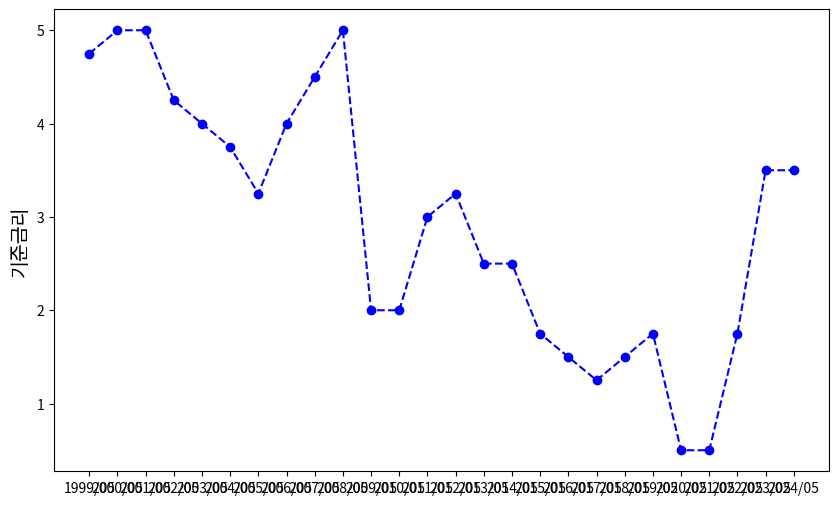

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sampled = df.iloc[::12]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_sampled['변환'], df_sampled[df_sampled.columns[1]], color='b', marker='o', linestyle='--', label='기준금리')
ax1.set_ylabel('기준금리', fontsize=14)
ax1.tick_params(axis='y')

### 1-2) GDP데이터 변환
- **정의**: 국내총생산(GDP)은 한 국가의 경제 규모와 성장을 측정 지표
- 결측치 처리
- 특정 컬럼 추출
- 분기를 월 단위로 변환

In [299]:
import pandas as pd

file_num = 0

df_0 = read_csv(file_path[file_num])



GDP.csv 

데이터 프레임 구조: (100, 4) 

        변환        원자료   전기대비증감  전기대비증감률
0  2000/Q1  164,844.8      NaN      NaN
1  2000/Q2  166,144.7  1,299.9      0.8
2  2000/Q3  171,511.6  5,366.9      3.2
3  2000/Q4  173,231.4  1,719.8      1.0
4  2001/Q1  178,437.2  5,205.8      3.0

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       100 non-null    object 
 1   원자료      98 non-null     object 
 2   전기대비증감   97 non-null     object 
 3   전기대비증감률  97 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Nan 값 존재 데이터
         변환        원자료 전기대비증감  전기대비증감률
0   2000/Q1  164,844.8    NaN      NaN
98  2024/Q3        NaN    NaN      NaN
99  2024/Q4        NaN    NaN      NaN


In [300]:
import os
file_num = 0
df= df_0

# # 앞 값으로 대체
# df.fillna(method='Bfill', inplace=True)

#24년 3,4 제거
df.dropna(how="any", inplace=True)
print(df[df.isnull().any(axis=1)])
print(df.head())



Empty DataFrame
Columns: [변환, 원자료, 전기대비증감, 전기대비증감률]
Index: []
        변환        원자료   전기대비증감  전기대비증감률
1  2000/Q2  166,144.7  1,299.9      0.8
2  2000/Q3  171,511.6  5,366.9      3.2
3  2000/Q4  173,231.4  1,719.8      1.0
4  2001/Q1  178,437.2  5,205.8      3.0
5  2001/Q2  182,705.6  4,268.4      2.4


#### 시각화
- 금리와 비교해 봤을때 GDP는 지속적으로 증가하지만 금리는 

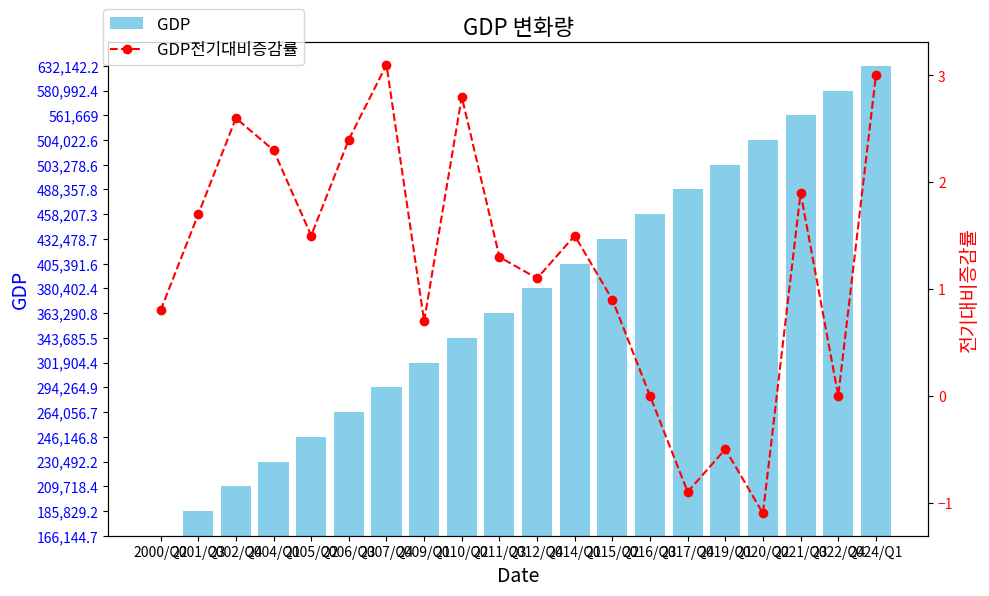

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 가독성 때문에 5번째 행 데이터만 시각화
df_sampled = df.iloc[::5]

# 그래프 크기(figsize=(10,6))를 설정하고 매인 축(ax1) 그래프 생성
# fig(figure): 그래프의 전체 캔버스 객체, 모든 axes(축)과 그래프 요소가 들어갑니다. 
# ax1(Axes): 실제 데이터를 시각화하는 공간(x축, y축, 데이터 포인트, 제목등)
# subplots함수: figure와 하나 이상의 axes 객체 생성하는 함수
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프 생성 (메인 축)
# x축: 변환, y축: 원자료, 레이블: GDP 으로 설정
ax1.bar(df_sampled["변환"], df_sampled['원자료'], color='skyblue', label='GDP')
# x축 레이블
ax1.set_xlabel('Date', fontsize=14)
# y축 레이블
ax1.set_ylabel('GDP', fontsize=14, color='blue')
#y출 레이블의 색상
ax1.tick_params(axis='y', labelcolor='blue')
#ax1축에 대한 제목
ax1.set_title('GDP 변화량', fontsize=16)

# ax1의 x축을 공유하는 새로운 y축(ax2)축, 이중 축으로 생성
ax2 = ax1.twinx()
# 선 그래프 생성(x축: "변환", y축: "전기대비증감률")
ax2.plot(df_sampled['변환'], df_sampled[df_sampled.columns[3]], color='red', marker='o', linestyle='--', label='GDP전기대비증감률')
ax2.set_ylabel('전기대비증감률', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

#범례 추가
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1), fontsize=12)

plt.tight_layout()
plt.show()

In [302]:
import plotly.graph_objects as go
import pandas as pd

# 5개마다 샘플링
df_sampled = df.iloc[:]

# 애니메이션 프레임을 생성합니다.
# 애니메이션은 시간에 따라 점진적으로 변하는 그래프를 나타냅니다.
# 시간별 각 그래프를 프레임에 추가하여 순차적으로 보여주어 애니메이션을 동작합니다.
frames = []
# 데이터의 길이만큼 반복하여 애니메이션 프레임 리스트에 추가합니다.
for i in range(len(df_sampled)):
    #프레임 정의
    frame = go.Frame(
        data=[
            # 막대 그래프 (GDP)
            go.Bar(
                # X축 데이터(날짜) : (i번째까지 데이터 사용) 
                x=df_sampled['변환'][:i+1],
                # y축 데이터: GDP (GDP, i번째까지 데이터 사용)
                y=df_sampled['원자료'][:i+1],
                name='GDP',
                marker=dict(color='skyblue'),
                yaxis='y1',  # 왼쪽 y축
            ),
            # 선 그래프 (전기대비증감률)
            go.Scatter(
                x=df_sampled['변환'][:i+1],
                y=df_sampled['전기대비증감률'][:i+1],
                name='GDP 변화량',
                mode='lines+markers',
                line=dict(color='red', dash='dash'),
                # 데이터 점의 크기 설정
                marker=dict(size=10),
                # 두 번째 y축 (오른쪽 y축)을 사용합니다.
                yaxis='y2', 
            )
        ],
        # 프레임 이름
        name=f"Frame {i}"
    )
    # 생성된 프레임을 리스트에 추가합니다.
    frames.append(frame)

# 기본 그래프 설정
# 그래프 객체를 생성합니다.
fig = go.Figure(
    data=[
        # 막대 그래프 (GDP)
        go.Bar(
            x=df_sampled['변환'],
            y=df_sampled['원자료'],
            name='GDP',
            marker=dict(color='skyblue'),
            # 첫 번째 y축 (왼쪽 y축)을 사용합니다.
            yaxis='y1',
        ),
        # 선 그래프 (전기대비증감률) 생성
        go.Scatter(
            x=df_sampled['변환'],
            y=df_sampled['전기대비증감률'],
            name='GDP ',
            mode='lines+markers',
            line=dict(color='red', dash='dash'),
            # 데이터 점의 크기 설정
            marker=dict(size=10),
            yaxis='y2',  # 오른쪽 y축
        )
    ],
    # 그래프의 레이아웃을 설정합니다.
    layout=go.Layout(
        title="GDP 변화량 및 전기대비 증감률",
        xaxis=dict(title="날짜"),
        yaxis=dict(
            title="GDP",
            titlefont=dict(color="blue"),
            tickfont=dict(color="blue"),
            side="left"
        ),
        yaxis2=dict(
            title="전기대비증감률",
            overlaying='y',  # 기존 y축에 겹침
            side="right",
            titlefont=dict(color="red"),
            tickfont=dict(color="red"),
            rangemode="tozero"  # 축 범위가 0부터 시작
        ),
        # 범례의 위치 설정 (그래프 상단)
        legend=dict(x=0.1, y=1.1),
    ),
     # 생성된 프레임 추가
    frames=frames
)

# 애니메이션 설정 추가
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")]
                ),
            ]
        )
    ]
)

# 애니메이션 표시
fig.show()


In [303]:
# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[3]]]
df = df.rename(columns={df.columns[1]:'GDP_변동률'})
print(df.head())

# 분기를 월로 변환환
monthly_data = []
columns = df.columns
for index, row in df.iterrows():
    year, quarter = row[columns[0]].split('/')
    start_month = (int(quarter[1]) - 1) * 3 + 1
    for i in range(3):
        item={}
        item[columns[0]] = f"{year}/{str(start_month + i).zfill(2)}"
        item[columns[1]] = row[columns[1]] / 3

        monthly_data.append(item)
        
monthly_df = pd.DataFrame(monthly_data)
print(monthly_df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = monthly_df )

        변환  GDP_변동률
1  2000/Q2      0.8
2  2000/Q3      3.2
3  2000/Q4      1.0
4  2001/Q1      3.0
5  2001/Q2      2.4
        변환   GDP_변동률
0  2000/04  0.266667
1  2000/05  0.266667
2  2000/06  0.266667
3  2000/07  1.066667
4  2000/08  1.066667


### 1-2) 경제성장률 데이터 변환
- Nan 값이 없다
- 컬럼 값이 이상
    - 원계열 : (실업자 수 / 경제활동인구) × 100
    - 계절조정: 실업률 데이터에서 방학 기간 동안의 아르바이트 증가와 같은 계절적 요인을 제거하여 순수 경기적 요인만 반영한 지표

In [304]:
import pandas as pd

file_num = 1

df_1 = read_csv(file_path[file_num])

경제성장률.csv 

데이터 프레임 구조: (312, 2) 

        변환  원자료
0  1947/Q1  NaN
1  1947/Q2  NaN
2  1947/Q3  NaN
3  1947/Q4  NaN
4  1948/Q1  NaN

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      312 non-null    object 
 1   원자료     258 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB
None

Nan 값 존재 데이터
          변환  원자료
0    1947/Q1  NaN
1    1947/Q2  NaN
2    1947/Q3  NaN
3    1947/Q4  NaN
4    1948/Q1  NaN
5    1948/Q2  NaN
6    1948/Q3  NaN
7    1948/Q4  NaN
8    1949/Q1  NaN
9    1949/Q2  NaN
10   1949/Q3  NaN
11   1949/Q4  NaN
12   1950/Q1  NaN
13   1950/Q2  NaN
14   1950/Q3  NaN
15   1950/Q4  NaN
16   1951/Q1  NaN
17   1951/Q2  NaN
18   1951/Q3  NaN
19   1951/Q4  NaN
20   1952/Q1  NaN
21   1952/Q2  NaN
22   1952/Q3  NaN
23   1952/Q4  NaN
24   1953/Q1  NaN
25   1953/Q2  NaN
26   1953/Q3  NaN
27   1953/Q4  NaN
28   1954/Q1 

In [305]:
import os
file_num = 1
df= df_1

#24년  제거
df.dropna(how="any", inplace=True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 특정 컬럼값 추출
df = df.rename(columns={df.columns[1]:'경제성장률'})


# 분기를 월로 변환환
monthly_data = []
columns = df.columns
for index, row in df.iterrows():
    year, quarter = row[columns[0]].split('/')
    start_month = (int(quarter[1]) - 1) * 3 + 1
    for i in range(3):
        item={}
        item[columns[0]] = f"{year}/{str(start_month + i).zfill(2)}"
        item[columns[1]] = row[columns[1]] / 3 * (i+1)

        monthly_data.append(item)
        
monthly_df = pd.DataFrame(monthly_data)
print(monthly_df)

# 파일 저장
save_csv(file_path= file_path[file_num], df = monthly_df )

Empty DataFrame
Columns: [변환, 원자료]
Index: []
         변환    원자료
53  1960/Q2  4.496
54  1960/Q3 -1.112
55  1960/Q4  0.596
56  1961/Q1  3.201
57  1961/Q2  4.316
          변환     경제성장률
0    1960/04  1.498667
1    1960/05  2.997333
2    1960/06  4.496000
3    1960/07 -0.370667
4    1960/08 -0.741333
..       ...       ...
769  2024/05 -0.152000
770  2024/06 -0.228000
771  2024/07  0.044667
772  2024/08  0.089333
773  2024/09  0.134000

[774 rows x 2 columns]


### 1-3) 국제 에너지 원자제가격(유가)
- Nan 값 제거
- 특정값 추출
- 평균 유가로 계산(원유-WTL, 원유-Dubai, 원유-Brent)

In [306]:
import pandas as pd

file_num = 2

df_2 = read_csv(file_path[file_num])

국제_에너지_원자제가격.csv 

데이터 프레임 구조: (418, 9) 

        변환  원자료  전기대비증감률  원자료.1  전기대비증감률.1  원자료.2  전기대비증감률.2  원자료.3  전기대비증감률.3
0  1990/01  NaN      NaN  22.60        NaN  17.50        NaN  20.99        NaN
1  1990/02  NaN      NaN  22.20       -1.8  16.68       -4.7  19.70       -6.1
2  1990/03  NaN      NaN  20.44       -7.9  15.76       -5.5  18.47       -6.2
3  1990/04  NaN      NaN  18.53       -9.3  14.25       -9.6  16.93       -8.3
4  1990/05  NaN      NaN  18.44       -0.5  14.65        2.8  16.67       -1.5

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   변환         418 non-null    object 
 1   원자료        0 non-null      float64
 2   전기대비증감률    0 non-null      float64
 3   원자료.1      418 non-null    float64
 4   전기대비증감률.1  417 non-null    float64
 5   원자료.2      418 non-null    float64
 6   전기대비증감률.2  417 non-null    float64
 7   원자료.

In [307]:
import os
file_num = 2
df= df_2

# 컬럼값 정상화
# df = df.rename(columns={df.columns[1]:''})

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[4], columns[6], columns[8]]]
print(df)

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 분기를 월로 변환환


# 세 값들의 평균
df["원유_변동률"] = df.iloc[:,-3:].mean(axis=1)
c=df.columns
df = df[[c[0], c[-1]]]
print(df)

# 파일 저장
save_csv(file_path= file_path[file_num], df = df )

          변환  전기대비증감률.1  전기대비증감률.2  전기대비증감률.3
0    1990/01        NaN        NaN        NaN
1    1990/02       -1.8       -4.7       -6.1
2    1990/03       -7.9       -5.5       -6.2
3    1990/04       -9.3       -9.6       -8.3
4    1990/05       -0.5        2.8       -1.5
..       ...        ...        ...        ...
413  2024/06       -0.1       -0.7       -0.2
414  2024/07        2.6        1.3        1.4
415  2024/08       -6.4       -6.0       -6.0
416  2024/09       -8.1       -7.9       -7.5
417  2024/10        2.4        3.1        3.0

[418 rows x 4 columns]
Empty DataFrame
Columns: [변환, 전기대비증감률.1, 전기대비증감률.2, 전기대비증감률.3]
Index: []
        변환  전기대비증감률.1  전기대비증감률.2  전기대비증감률.3
1  1990/02       -1.8       -4.7       -6.1
2  1990/03       -7.9       -5.5       -6.2
3  1990/04       -9.3       -9.6       -8.3
4  1990/05       -0.5        2.8       -1.5
5  1990/06       -9.4       -9.4       -6.7
          변환    원유_변동률
1    1990/02 -4.200000
2    1990/03 -6.533333
3    1990/04 -9.06

C:\Users\HYUK\AppData\Local\Temp\ipykernel_40592\2442021113.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HYUK\AppData\Local\Temp\ipykernel_40592\2442021113.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 1-4) 미국 금리
- Nan 값 제거
- 특정값 추출: 미국 금리 자체가 % 단위 이기에 전기대비증감량과 전기대비증감률에 큰 의미가 없다고 판단되어 원자료만 추출

In [308]:
import pandas as pd

file_num = 3

df_3 = read_csv(file_path[file_num])

미국_Fed_기준금리.csv 

데이터 프레임 구조: (843, 4) 

        변환   원자료  전기대비증감 전기대비증감률
0  1954/07  0.25     NaN     NaN
1  1954/08  1.44    1.19   476.0
2  1954/09  1.44    0.00     0.0
3  1954/10  1.13   -0.31   -21.5
4  1954/11  1.38    0.25    22.1

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       843 non-null    object 
 1   원자료      843 non-null    float64
 2   전기대비증감   842 non-null    float64
 3   전기대비증감률  842 non-null    object 
dtypes: float64(2), object(2)
memory usage: 26.5+ KB
None

Nan 값 존재 데이터
        변환   원자료  전기대비증감 전기대비증감률
0  1954/07  0.25     NaN     NaN


In [309]:
import os
file_num = 3
df= df_3

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[1]]]
df = df.rename(columns={df.columns[1]:'미국금리'})
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df ) 

        변환  미국금리
0  1954/07  0.25
1  1954/08  1.44
2  1954/09  1.44
3  1954/10  1.13
4  1954/11  1.38


### 1-5) 생산자 물가 지수(PPI)
- 정의: 국내 생산자가 국내시장에 공급하는 상품과 서비스의 가격 변동을 측정하는 경제 지표
    - 기준 연도를 100으로 설정하고, 현재 가격 수준을 이와 비교하여 지수화한 지표입니다. 현제 기준년도는 2020년 입니다.
- 특정값 추출: 인플레이션으로 인하여 전기대비증감률

In [310]:
import pandas as pd

file_num = 4

df_4 = read_csv(file_path[file_num])

생산자물가지수.csv 

데이터 프레임 구조: (717, 4) 

        변환   원자료  전기대비증감  전기대비증감률
0  1965/01  4.88     NaN      NaN
1  1965/02  4.92    0.04      0.8
2  1965/03  4.88   -0.04     -0.8
3  1965/04  4.88    0.00      0.0
4  1965/05  4.98    0.10      2.0

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       717 non-null    object 
 1   원자료      717 non-null    float64
 2   전기대비증감   716 non-null    float64
 3   전기대비증감률  716 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.5+ KB
None

Nan 값 존재 데이터
        변환   원자료  전기대비증감  전기대비증감률
0  1965/01  4.88     NaN      NaN


In [311]:
import os
file_num = 4
df = df_4

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[3]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'생산자물가지수(PPI)_증감률률'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df )

          변환  전기대비증감률
0    1965/01      NaN
1    1965/02      0.8
2    1965/03     -0.8
3    1965/04      0.0
4    1965/05      2.0
..       ...      ...
712  2024/05      0.1
713  2024/06      0.0
714  2024/07      0.3
715  2024/08     -0.2
716  2024/09     -0.2

[717 rows x 2 columns]
Empty DataFrame
Columns: [변환, 생산자물가지수(PPI)_증감률률]
Index: []
        변환  생산자물가지수(PPI)_증감률률
1  1965/02                0.8
2  1965/03               -0.8
3  1965/04                0.0
4  1965/05                2.0
5  1965/06                2.0


### 1-6) 소비자 물가 지수(CPI)
- 정의: 일반 가정이 구매하는 재화와 용역의 평균 가격 변동을 나타내는 지수
    - 기준 연도를 100으로 설정하고, 현재 가격 수준을 이와 비교하여 지수화한 지표입니다. 현제 기준년도는 2020년 입니다.
- 특정값 추출: 인플레이션으로 인해 증감률로 추출하겠습니다.

In [312]:
import pandas as pd

file_num = 5

df_5 = read_csv(file_path[file_num])

소비자물가지수.csv 

데이터 프레임 구조: (718, 4) 

        변환    원자료  전기대비증감  전기대비증감률
0  1965/01  2.493     NaN      NaN
1  1965/02  2.548   0.055      2.2
2  1965/03  2.553   0.005      0.2
3  1965/04  2.593   0.040      1.6
4  1965/05  2.645   0.052      2.0

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       718 non-null    object 
 1   원자료      718 non-null    float64
 2   전기대비증감   717 non-null    float64
 3   전기대비증감률  717 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.6+ KB
None

Nan 값 존재 데이터
        변환    원자료  전기대비증감  전기대비증감률
0  1965/01  2.493     NaN      NaN


In [313]:
import os
file_num = 5
df = df_5

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[3]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'소비자물가지수(CPI)_변동률'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df )

          변환  전기대비증감률
0    1965/01      NaN
1    1965/02      2.2
2    1965/03      0.2
3    1965/04      1.6
4    1965/05      2.0
..       ...      ...
713  2024/06     -0.2
714  2024/07      0.3
715  2024/08      0.4
716  2024/09      0.1
717  2024/10      0.0

[718 rows x 2 columns]
Empty DataFrame
Columns: [변환, 소비자물가지수(CPI)_변동률]
Index: []
        변환  소비자물가지수(CPI)_변동률
1  1965/02               2.2
2  1965/03               0.2
3  1965/04               1.6
4  1965/05               2.0
5  1965/06              -0.9


### 1-7) 실업률
- **정의** : 실업률(%) = (실업자 수 ÷ 경제활동인구) × 100
    - **계절조정**: 실업률 데이터에서 계절적 요인을 제거하고 순수한 경기적 요인만을 반영한 지표
- **특정값 추출**: 다른 데이터와 비교하여 인과관계등을 분석할때 계절조정을 한 실업률은 많이 사용한다.

In [314]:
import pandas as pd


file_num = 6

df_6 = read_csv(file_path[file_num])

실업률.csv 

데이터 프레임 구조: (304, 3) 

        변환  원자료  원자료.1
0  1999/06  6.7    7.3
1  1999/07  6.7    7.0
2  1999/08  6.2    6.4
3  1999/09  5.2    5.7
4  1999/10  5.0    5.5

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      304 non-null    object 
 1   원자료     304 non-null    float64
 2   원자료.1   304 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB
None

Nan 값 존재 데이터
Empty DataFrame
Columns: [변환, 원자료, 원자료.1]
Index: []


In [315]:
import os
file_num = 6
df= df_6

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[2]]]
df = df.rename(columns={df.columns[1]:'실업률'})
print(df.head())

#24년 3,4 제거
df.dropna(how="any", inplace=True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df )


        변환  실업률
0  1999/06  7.3
1  1999/07  7.0
2  1999/08  6.4
3  1999/09  5.7
4  1999/10  5.5
Empty DataFrame
Columns: [변환, 실업률]
Index: []
        변환  실업률
0  1999/06  7.3
1  1999/07  7.0
2  1999/08  6.4
3  1999/09  5.7
4  1999/10  5.5


### 1-8) 원_달러_환율
- 특정값 추출: 해당 값도 지속적으로 증가하기에 증감률만 추출하겠습니다.

In [316]:
import pandas as pd

file_num = 7

df_7 = read_csv(file_path[file_num])

원달러_환율.csv 

데이터 프레임 구조: (726, 4) 

        변환     원자료  전기대비증감  전기대비증감률
0  1964/05  255.77     NaN      NaN
1  1964/06  255.77     0.0      0.0
2  1964/07  255.77     0.0      0.0
3  1964/08  255.77     0.0      0.0
4  1964/09  255.77     0.0      0.0

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       726 non-null    object 
 1   원자료      726 non-null    object 
 2   전기대비증감   725 non-null    float64
 3   전기대비증감률  725 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.8+ KB
None

Nan 값 존재 데이터
        변환     원자료  전기대비증감  전기대비증감률
0  1964/05  255.77     NaN      NaN


In [317]:
import os
file_num = 7
df = df_7

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[3]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'환율_변동율'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df ) 

          변환  전기대비증감률
0    1964/05      NaN
1    1964/06      0.0
2    1964/07      0.0
3    1964/08      0.0
4    1964/09      0.0
..       ...      ...
721  2024/06      1.1
722  2024/07      0.2
723  2024/08     -2.1
724  2024/09     -1.4
725  2024/10      2.0

[726 rows x 2 columns]
Empty DataFrame
Columns: [변환, 환율_변동율]
Index: []
        변환  환율_변동율
1  1964/06     0.0
2  1964/07     0.0
3  1964/08     0.0
4  1964/09     0.0
5  1964/10     0.0


### 1-9) 대출금 연체율
- Nan 값이 너무 많다 02년 부터 4월 까지는 1년에 1번만 값이 있고 05년 부터 달마다 존재

In [318]:
import pandas as pd

file_num = 8

df_8 = read_csv(file_path[file_num])

은행대출금_연체율.csv 

데이터 프레임 구조: (261, 19) 

        변환  원자료  전기대비증감  원자료.1  전기대비증감.1  원자료.2  전기대비증감.2  원자료.3  전기대비증감.3  \
0  2002/12  1.8     NaN    2.0       NaN    1.4       NaN    1.5       NaN   
1  2003/01  NaN     NaN    NaN       NaN    NaN       NaN    NaN       NaN   
2  2003/02  NaN     NaN    NaN       NaN    NaN       NaN    NaN       NaN   
3  2003/03  NaN     NaN    NaN       NaN    NaN       NaN    NaN       NaN   
4  2003/04  NaN     NaN    NaN       NaN    NaN       NaN    NaN       NaN   

   원자료.4  전기대비증감.4  원자료.5  전기대비증감.5  원자료.6  전기대비증감.6  원자료.7  전기대비증감.7  원자료.8  \
0    1.5       NaN    1.5       NaN    8.5       NaN    8.6       NaN    8.3   
1    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
2    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
3    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
4    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN   

   전기대비증감.

In [319]:
import os
file_num = 8
df = df_8

# 특정 컬럼값 추출
columns = df.columns
df = df[[columns[0], columns[1], columns[3], columns[5], columns[7], columns[9], columns[11], columns[13], columns[15], columns[17],]]
print(df.head())
# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'기업대출_은행전체',
                        df.columns[2]:'기업대출_일반은행',
                        df.columns[3]:'기업대출_특수은행',
                        df.columns[4]:'가계대출_은행전체',
                        df.columns[5]:'가계대출_일반은행',
                        df.columns[6]:'가계대출_특수은행',
                        df.columns[7]:'신용카드대출_은행전체',
                        df.columns[8]:'신용카드대출_일반은행',
                        df.columns[9]:'신용카드대출_특수은행',})
columns = df.columns
df = df[[columns[0], columns[1], columns[4], columns[7], ]]
df = df.rename(columns={df.columns[1]:'기업대출',
                        df.columns[2]:'가계대출',
                        df.columns[3]:'신용카드대출',
                        })
print(df.head())

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df )

        변환  원자료  원자료.1  원자료.2  원자료.3  원자료.4  원자료.5  원자료.6  원자료.7  원자료.8
0  2002/12  1.8    2.0    1.4    1.5    1.5    1.5    8.5    8.6    8.3
1  2003/01  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2  2003/02  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
3  2003/03  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
4  2003/04  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
        변환  기업대출  가계대출  신용카드대출
0  2002/12   1.8   1.5     8.5
1  2003/01   NaN   NaN     NaN
2  2003/02   NaN   NaN     NaN
3  2003/03   NaN   NaN     NaN
4  2003/04   NaN   NaN     NaN
Empty DataFrame
Columns: [변환, 기업대출, 가계대출, 신용카드대출]
Index: []
         변환  기업대출  가계대출  신용카드대출
0   2002/12   1.8   1.5     8.5
12  2003/12   1.9   1.8     7.8
24  2004/12   1.8   1.7     4.1
29  2005/05   2.4   1.9     4.7
30  2005/06   1.8   1.5     3.1


### 1-10)대출금 연체율
- **정의**: 특정 시점의 주택 매매 가격을 기준으로 하여 가격 변동을 나타내는 지표
- 특정값 추출: 해당 값도 지속적으로 증가하기에 증감률만 추출하겠습니다.

In [320]:
import pandas as pd

file_num = 9

df_9 = read_csv(file_path[file_num])

주택매매가격지수.csv 

데이터 프레임 구조: (251, 4) 

        변환   원자료  전기대비증감  전기대비증감률
0  2003/11  61.5     NaN      NaN
1  2003/12  61.0    -0.5     -0.8
2  2004/01  60.7    -0.3     -0.5
3  2004/02  60.7     0.0      0.0
4  2004/03  60.8     0.1      0.2

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       251 non-null    object 
 1   원자료      251 non-null    float64
 2   전기대비증감   250 non-null    float64
 3   전기대비증감률  250 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.0+ KB
None

Nan 값 존재 데이터
        변환   원자료  전기대비증감  전기대비증감률
0  2003/11  61.5     NaN      NaN


In [321]:
import os
file_num = 9
df = df_9

columns = df.columns
df = df[[columns[0], columns[3]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'주택매매가격지수_변동율'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df ) 

          변환  전기대비증감률
0    2003/11      NaN
1    2003/12     -0.8
2    2004/01     -0.5
3    2004/02      0.0
4    2004/03      0.2
..       ...      ...
246  2024/05      0.0
247  2024/06      0.1
248  2024/07      0.1
249  2024/08      0.2
250  2024/09      0.2

[251 rows x 2 columns]
Empty DataFrame
Columns: [변환, 주택매매가격지수_변동율]
Index: []
        변환  주택매매가격지수_변동율
1  2003/12          -0.8
2  2004/01          -0.5
3  2004/02           0.0
4  2004/03           0.2
5  2004/04           0.2


### 1-11)통화량(M2)
- **정의**: 특정 시점의 주택 매매 가격을 기준으로 하여 가격 변동을 나타내는 지표
- 통화 종류
    - 협의통화(M1): 지급결제 수단으로서의 화폐 기능을 중시한 통화지표
    - 광의통화(M2): 화폐의 거래적 기능과 가치 저장 수단으로서의 기능을 모두 포함하는 통화지표
- 특정값 추출: 원자료 값이 지속적으로 증가하기에 증감률만 추출하겠습니다.

In [322]:
import pandas as pd

file_num = 10

df_10 = read_csv(file_path[file_num])

통화량.csv 

데이터 프레임 구조: (464, 4) 

        변환       원자료   전기대비증감  전기대비증감률
0  1986/01  43,133.6      NaN      NaN
1  1986/02  43,492.4    358.8      0.8
2  1986/03  44,587.1  1,094.7      2.5
3  1986/04  45,188.7    601.6      1.3
4  1986/05  46,197.5  1,008.8      2.2

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       464 non-null    object 
 1   원자료      464 non-null    object 
 2   전기대비증감   463 non-null    object 
 3   전기대비증감률  463 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.6+ KB
None

Nan 값 존재 데이터
        변환       원자료 전기대비증감  전기대비증감률
0  1986/01  43,133.6    NaN      NaN


In [323]:
import os
file_num = 10
df = df_10

columns = df.columns
df = df[[columns[0], columns[3]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'통화량_변동율'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df ) 

          변환  전기대비증감률
0    1986/01      NaN
1    1986/02      0.8
2    1986/03      2.5
3    1986/04      1.3
4    1986/05      2.2
..       ...      ...
459  2024/04      0.3
460  2024/05     -0.1
461  2024/06      0.6
462  2024/07      0.6
463  2024/08      0.1

[464 rows x 2 columns]
Empty DataFrame
Columns: [변환, 통화량_변동율]
Index: []
        변환  통화량_변동율
1  1986/02      0.8
2  1986/03      2.5
3  1986/04      1.3
4  1986/05      2.2
5  1986/06      1.8


### 1-11)한국은행 기준금리
- **정의**: 특정 시점의 주택 매매 가격을 기준으로 하여 가격 변동을 나타내는 지표
- 특정값 추출: 해당 값도 지속적으로 증가하기에 증감률만 추출하겠습니다.

In [324]:
import pandas as pd

file_num = 11

df_11 = read_csv(file_path[file_num])

한국은행_기준금리.csv 

데이터 프레임 구조: (370, 4) 

        변환  원자료  전기대비증감  전기대비증감률
0  1994/01  NaN     NaN      NaN
1  1994/02  NaN     NaN      NaN
2  1994/03  NaN     NaN      NaN
3  1994/04  NaN     NaN      NaN
4  1994/05  NaN     NaN      NaN

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       370 non-null    object 
 1   원자료      306 non-null    float64
 2   전기대비증감   305 non-null    float64
 3   전기대비증감률  305 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.7+ KB
None

Nan 값 존재 데이터
         변환   원자료  전기대비증감  전기대비증감률
0   1994/01   NaN     NaN      NaN
1   1994/02   NaN     NaN      NaN
2   1994/03   NaN     NaN      NaN
3   1994/04   NaN     NaN      NaN
4   1994/05   NaN     NaN      NaN
..      ...   ...     ...      ...
60  1999/01   NaN     NaN      NaN
61  1999/02   NaN     NaN      NaN
62  1999/03   NaN     NaN      Na

In [325]:
import os
file_num = 11
df = df_11

columns = df.columns
df = df[[columns[0], columns[1]]]
print(df)

# 컬럼값 변경
df = df.rename(columns={df.columns[1]:'기준금리'})

# Nan 값 제거
df.dropna(thresh=2, axis=0, inplace = True)
print(df[df.isnull().any(axis=1)])
print(df.head())

# 파일 저장
save_csv(file_path= file_path[file_num], df = df) 

          변환   원자료
0    1994/01   NaN
1    1994/02   NaN
2    1994/03   NaN
3    1994/04   NaN
4    1994/05   NaN
..       ...   ...
365  2024/06  3.50
366  2024/07  3.50
367  2024/08  3.50
368  2024/09  3.50
369  2024/10  3.25

[370 rows x 2 columns]
Empty DataFrame
Columns: [변환, 기준금리]
Index: []
         변환  기준금리
64  1999/05  4.75
65  1999/06  4.75
66  1999/07  4.75
67  1999/08  4.75
68  1999/09  4.75


### 1-12) 데이터 1개의 csv로 합치기

In [326]:
import pandas as pd
import os

# 여기에 CSV 파일들이 있는 디렉토리 경로를 입력하세요
input_directory = '../new_csv'  
 # 결과 파일 이름
output_file = '../all_data.csv' 

# 모든 CSV 파일 합치기
def merge_csv_files(input_directory, output_file):
    all_files = [os.path.join(input_directory, f) for f in os.listdir(input_directory) if f.endswith('.csv')]
    merged_data = pd.read_csv(all_files[0])

    print(all_files[0])

    for file in all_files[1:]:
        df = pd.read_csv(file)  # CSV 파일 읽기
        print(file)
        # df = transform_data(df)  # 데이터 변환
        # merged_data = pd.concat([merged_data, df], ignore_index=True)  # 데이터 합치기
        merged_data = pd.merge(merged_data, df, how="outer", on="변환")
    
    # 결과 저장
    merged_data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"Merged file saved to {output_file}")

# 실행
merge_csv_files(input_directory, output_file)


../new_csv\new_GDP.csv
../new_csv\new_경제성장률.csv
../new_csv\new_국제_에너지_원자제가격.csv
../new_csv\new_미국_Fed_기준금리.csv
../new_csv\new_생산자물가지수.csv
../new_csv\new_소비자물가지수.csv
../new_csv\new_실업률.csv
../new_csv\new_원달러_환율.csv
../new_csv\new_은행대출금_연체율.csv
../new_csv\new_주택매매가격지수.csv
../new_csv\new_통화량.csv
../new_csv\new_한국은행_기준금리.csv
Merged file saved to ../all_data.csv


In [327]:
read_csv(file_path[file_num])

한국은행_기준금리.csv 

데이터 프레임 구조: (370, 4) 

        변환  원자료  전기대비증감  전기대비증감률
0  1994/01  NaN     NaN      NaN
1  1994/02  NaN     NaN      NaN
2  1994/03  NaN     NaN      NaN
3  1994/04  NaN     NaN      NaN
4  1994/05  NaN     NaN      NaN

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   변환       370 non-null    object 
 1   원자료      306 non-null    float64
 2   전기대비증감   305 non-null    float64
 3   전기대비증감률  305 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.7+ KB
None

Nan 값 존재 데이터
         변환   원자료  전기대비증감  전기대비증감률
0   1994/01   NaN     NaN      NaN
1   1994/02   NaN     NaN      NaN
2   1994/03   NaN     NaN      NaN
3   1994/04   NaN     NaN      NaN
4   1994/05   NaN     NaN      NaN
..      ...   ...     ...      ...
60  1999/01   NaN     NaN      NaN
61  1999/02   NaN     NaN      NaN
62  1999/03   NaN     NaN      Na

,변환,원자료,전기대비증감,전기대비증감률
0,1994/01,NaN,NaN,NaN
1,1994/02,NaN,NaN,NaN
2,1994/03,NaN,NaN,NaN
3,1994/04,NaN,NaN,NaN
4,1994/05,NaN,NaN,NaN
...,...,...,...,...
365,2024/06,3.50,0.00,0.0
366,2024/07,3.50,0.00,0.0
367,2024/08,3.50,0.00,0.0
368,2024/09,3.50,0.00,0.0
